In [46]:
import numpy as np
import pandas as pd

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import math
from pathlib import Path
from sklearn.model_selection import train_test_split

In [47]:
data_path = Path('../data/01_raw')
ss_path = data_path / 'sampleSubmission.csv'
train_path = data_path / 'train.csv'
test_path = data_path / 'test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
ss = pd.read_csv(ss_path)

In [48]:
train_df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [49]:
target = train_df["target"]
dict_a = {"Class_1": 0,
          "Class_2": 1,
          "Class_3": 2,
          "Class_4": 3,
          "Class_5": 4,
          "Class_6": 5,
          "Class_7": 6,
          "Class_8": 7,
          "Class_9": 8,
         }
target = target.map(dict_a)

In [50]:
train_df.columns

Index(['id', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6',
       'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12',
       'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18',
       'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24',
       'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42',
       'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48',
       'feat_49', 'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54',
       'feat_55', 'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60',
       'feat_61', 'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66',
       'feat_67', 'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72',
       'feat_73', 'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78',
       'feat_79', 'feat_80', 'feat_81', 'feat_82', 'fe

In [51]:
train_df = train_df.drop(["id", "target"], axis=1)

In [52]:
tr_x, val_x, tr_y, val_y = train_test_split(train_df, target, test_size=0.2, random_state=42)

In [53]:
import lightgbm as lgb

params = {
          "objective" : "multiclass",
    "metric": "multi_logloss",
          "num_class" : 9,
          "num_leaves" : 60,
          "max_depth": 16,
          "learning_rate" : 0.01,
          "bagging_fraction" : 0.9,  # subsample
          "feature_fraction" : 0.9,  # colsample_bytree
          "bagging_freq" : 5,        # subsample_freq
          "bagging_seed" : 2018,
          "verbosity" : -1 }

In [54]:
lgtrain, lgval = lgb.Dataset(tr_x, tr_y), lgb.Dataset(val_x, val_y)
lgbmodel = lgb.train(params, lgtrain, 2000, valid_sets=[lgtrain, lgval], early_stopping_rounds=100, verbose_eval=200)

Training until validation scores don't improve for 100 rounds
[200]	training's multi_logloss: 0.734636	valid_1's multi_logloss: 0.786416
[400]	training's multi_logloss: 0.505266	valid_1's multi_logloss: 0.590725
[600]	training's multi_logloss: 0.407872	valid_1's multi_logloss: 0.524464
[800]	training's multi_logloss: 0.351178	valid_1's multi_logloss: 0.494298
[1000]	training's multi_logloss: 0.312516	valid_1's multi_logloss: 0.478249
[1200]	training's multi_logloss: 0.282447	valid_1's multi_logloss: 0.467982
[1400]	training's multi_logloss: 0.257825	valid_1's multi_logloss: 0.461251
[1600]	training's multi_logloss: 0.237128	valid_1's multi_logloss: 0.45665
[1800]	training's multi_logloss: 0.219382	valid_1's multi_logloss: 0.453467
[2000]	training's multi_logloss: 0.203893	valid_1's multi_logloss: 0.451313
Did not meet early stopping. Best iteration is:
[2000]	training's multi_logloss: 0.203893	valid_1's multi_logloss: 0.451313


In [55]:
test_df = test_df.drop(["id"], axis=1)


In [56]:
pred = lgbmodel.predict(test_df)
pred

array([[1.43328937e-04, 1.36107824e-01, 1.60771185e-01, ...,
        1.98847753e-03, 2.91575024e-04, 5.24740280e-05],
       [8.51677080e-04, 1.00158600e-02, 4.14858967e-03, ...,
        8.13372997e-04, 4.36823434e-01, 1.05565894e-03],
       [4.80518737e-06, 2.87906679e-05, 1.91604000e-05, ...,
        1.60134913e-05, 3.31178202e-04, 5.46730683e-06],
       ...,
       [3.41935791e-04, 5.58762996e-01, 3.03579781e-01, ...,
        8.86232233e-04, 3.13672823e-04, 1.20685182e-04],
       [4.70239453e-05, 2.05334359e-01, 1.44742897e-02, ...,
        3.47301789e-04, 3.10008794e-05, 1.67426806e-05],
       [2.16322886e-04, 5.37690989e-01, 3.94071100e-01, ...,
        2.76175891e-02, 1.94419004e-04, 8.81848211e-05]])

In [58]:
ss.iloc[:, 1:] = pred
ss

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,0.000143,0.136108,0.160771,0.700412,1.895010e-06,0.000231,0.001988,0.000292,0.000052
1,2,0.000852,0.010016,0.004149,0.000963,3.301633e-05,0.545295,0.000813,0.436823,0.001056
2,3,0.000005,0.000029,0.000019,0.000004,7.076644e-08,0.999591,0.000016,0.000331,0.000005
3,4,0.000087,0.439285,0.550973,0.008811,3.018394e-06,0.000087,0.000146,0.000191,0.000417
4,5,0.065032,0.000318,0.000396,0.000110,6.229410e-06,0.001346,0.003434,0.033055,0.896303
...,...,...,...,...,...,...,...,...,...,...
144363,144364,0.526458,0.007637,0.004216,0.006668,6.358203e-06,0.399907,0.015096,0.012184,0.027828
144364,144365,0.000397,0.274250,0.571336,0.079657,7.476539e-06,0.000689,0.073311,0.000226,0.000126
144365,144366,0.000342,0.558763,0.303580,0.135497,6.071792e-06,0.000492,0.000886,0.000314,0.000121
144366,144367,0.000047,0.205334,0.014474,0.779714,1.235255e-06,0.000034,0.000347,0.000031,0.000017


In [59]:
ss.to_csv("submit_test.csv", index=None)

In [91]:
train_df["feat_1"].value_counts().sort_index()

0     51483
1      5906
2      1829
3       981
4       521
5       471
6       207
7       192
8        71
9        55
10       15
11       24
12        5
13       10
14        4
15        8
16        3
17        4
19        5
20        1
21        4
22       32
23        4
24        5
25        3
26        6
27        3
28        4
29        1
30        2
31        2
32        1
34        1
37        1
39        2
40        1
42        2
43        2
47        2
48        3
56        1
61        1
Name: feat_1, dtype: int64

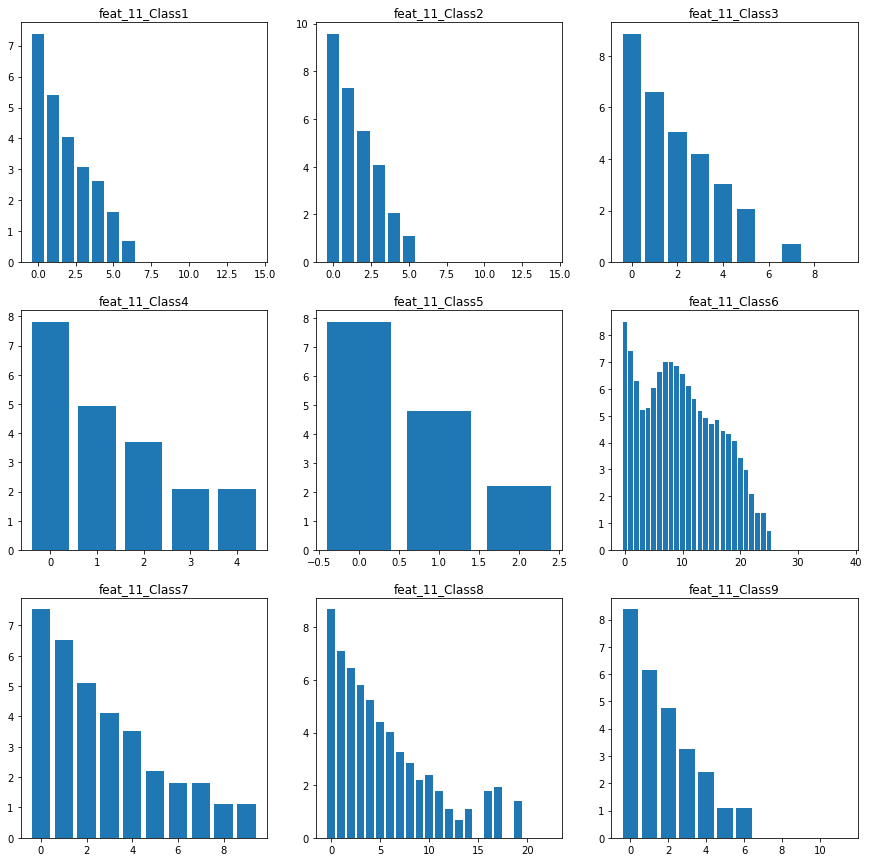

In [107]:
fig, axs = plt.subplots(3, 3, figsize=(5 * 3, 5 * 3))
num = 11
for i in range(9):
    data = train_df[target == i][f"feat_{num}"]
    ax = axs[i // 3][i % 3]
    memo = np.log(data.value_counts().sort_index())
    # print(data)
    ax.set_title(f"feat_{num}_Class{i+1}")
    ax.bar(list(memo.index), memo)
    # ax.(1)
    